Compute the Jacobian of Equations 15 and 16
==

In [1]:
from __future__ import division

In [33]:
import sympy
sympy.init_printing()
#x_1, x_2, x, X = sympy.symbols('x_1, x_2, x, X')
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s = sympy.symbols('e, e_p^s, e_r^s, v_p, v_ps, v_r, Phi, phi, lambda, v, phi, Gamma_p, Gamma_r, p, p_p^s, p_r^s')


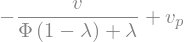

In [26]:
#f1 = 20. + ([(x**2 - 10. * np.cos(2. * np.pi * x)) for x in X])
f1 = v_p - v/(lambd + (1 - lambd) * Phi)
f1  

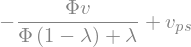

In [27]:
f2 = v_ps - (Phi * v)/(lambd + (1 - lambd) * Phi)
f2

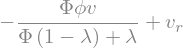

In [28]:
f3 = v_r - (phi * Phi * v)/(lambd + (1 - lambd) * Phi)
f3

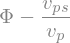

In [29]:
f4 = Phi - v_ps/v_p
f4

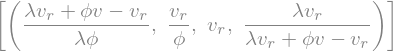

In [30]:
sympy.solve([f1, f2, f3, f4], [v_p, v_ps, v_r, Phi])

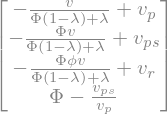

In [31]:
F = sympy.Matrix([f1,f2, f3, f4])
F

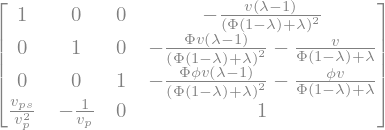

In [32]:
F.jacobian([v_p, v_ps, v_r, Phi])

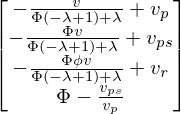

In [29]:
F = sympy.Matrix([f1,f2, f3, f4])
F

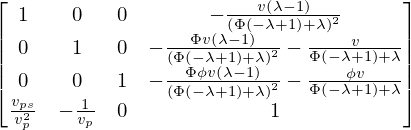

In [30]:
F.jacobian([v_p, v_ps, v_r, Phi])

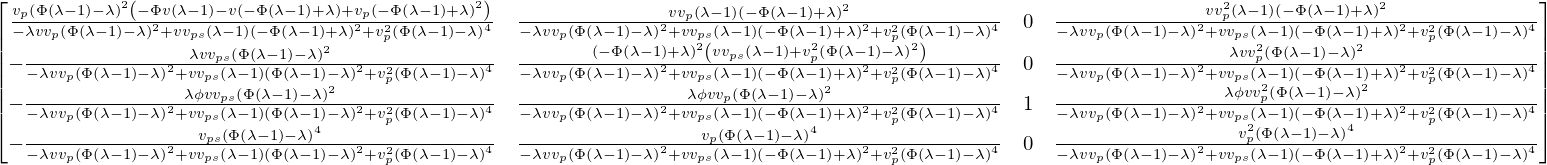

In [36]:
sympy.simplify(F.jacobian([v_p, v_ps, v_r, Phi]).inv())

In [37]:
sympy.init_printing(False)
F.jacobian([v_p, v_ps, v_r, Phi])

Matrix([
[          1,      0, 0,                                              -v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2],
[          0,      1, 0,         -Phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - v/(Phi*(-lambda + 1) + lambda)],
[          0,      0, 1, -Phi*phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - phi*v/(Phi*(-lambda + 1) + lambda)],
[v_ps/v_p**2, -1/v_p, 0,                                                                                            1]])

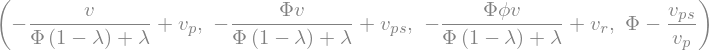

In [34]:
f1, f2, f3, f4

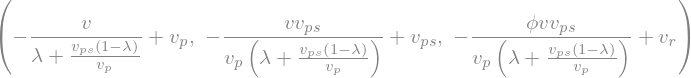

In [38]:
f1l = f1.subs(Phi, v_ps/v_p)
f2l = f2.subs(Phi, v_ps/v_p)
f3l = f3.subs(Phi, v_ps/v_p)
f1l, f2l, f3l

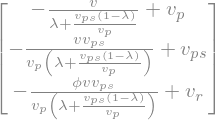

In [41]:
Fl = sympy.Matrix([f1l, f2l, f3l])
Fl

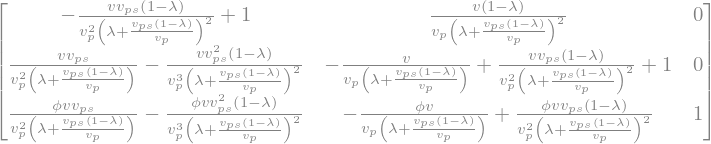

In [46]:
Fl.jacobian([v_p, v_ps, v_r])

Attempt to find an explicit expression for pressure, given the internal energy
===

In [4]:
import sympy
sympy.init_printing()
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s = sympy.symbols('e, e_p^s, e_r^s, v_p, v_ps, v_r, Phi, phi, lambda, v, phi, Gamma_p, Gamma_r, p, p_p^s, p_r^s')
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s

Starting point Equation 12 

$$
e(v, p, \lambda, \phi)=(1-\lambda) e_{\mathrm{ps}}\left(v_{\mathrm{ps}}, p_{\mathrm{ps}}, \phi\right)+\lambda e_{p}\left(v_{p}, p_{p}\right)
$$

where $\phi=\frac{v_{r}}{v}$ and

$$
v=(1-\lambda) v_{\mathrm{ps}}+\lambda v_{p}
$$

with $p_{p s}=p_{p}=p$

$$
\Phi \equiv v_{p s} / v_{p}
$$

The volume closures are:

$$
v_{p}=\frac{v}{[\lambda+(1-\lambda) \Phi]}
$$

$$
v_{\mathrm{ps}}=\frac{\Phi v}{[\lambda+(1-\lambda) \Phi]}
$$


$$
v_{r}=\frac{\phi \Phi v}{[\lambda+(1-\lambda) \Phi]}
$$

The EOS is summarised in Equation 17 as:

$$
e(v, p, \lambda, \phi)=(1-\lambda) e_{r}\left(p / \phi, v_{r}\right)+\lambda e_{p}\left(p, v_{p}\right)
$$


When  $\lambda=0$ we get $v_{\mathrm{ps}}=v$ and $v_{r}=\phi v$.

Now we substitute equations A1 and A8:

$$
e_{p}(p, v)=e_{p}^{s}(v)+\frac{v}{\Gamma_{p}(v)}\left[p-p_{p}^{s}(v)\right]
$$

$$
e_{r}(p, v)=e_{r}^{s}(v)+\frac{v}{\Gamma_{r}(v)}\left[p-p_{r}^{s}(v)\right]
$$

with the subscripts specified in Equation 17:

$$
e_{p}(p, v_{p})=e_{p}^{s}(v_{p})+\frac{v_{p}}{\Gamma_{p}(v_{p})}\left[p-p_{p}^{s}(v_{p})\right]
$$

$$
e_{r}(p / \phi, v_{r})=e_{r}^{s}(v_{r})+\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]
$$

Substitute into equation 17:

$$
e(v, p, \lambda, \phi)=(1-\lambda)\left(e_{r}^{s}(v_{r})+\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]\right)
+\lambda \left(e_{p}^{s}(v_{p})+\frac{v_{p}}{\Gamma_{p}(v_{p})}\left[p-p_{p}^{s}(v_{p})\right]\right)
$$

(where the volumes $v_p$, $v_{ps}$ (unused), $v_r$ are solved with the closure relations above from supplied $v$, $\lambda$ and $\phi$)

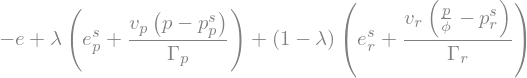

In [5]:
f1 = - e + ((1 - lambd) * (e_r_s + (v_r/gam_r) * (p/phi - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f1

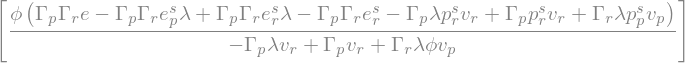

In [6]:
sympy.solve(f1, p)

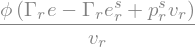

In [13]:
# NOTE: When the reaction progress is still lambd = 0, then all product terms are cancelled out:
f2 = sympy.solve(f1, p)
f2[0].subs(lambd, 0).simplify()

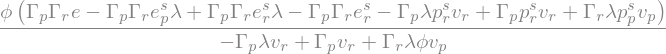

In [15]:
f3 = sympy.solve(f1, p)
f3[0].simplify()

In [75]:
sympy.init_printing(False)
sympy.solve(f1, p)

[phi*(Gamma_p*Gamma_r*e - Gamma_p*Gamma_r*e_p^s*lambda + Gamma_p*Gamma_r*e_r^s*lambda - Gamma_p*Gamma_r*e_r^s - Gamma_p*lambda*p_r^s*v_r + Gamma_p*p_r^s*v_r + Gamma_r*lambda*p_p^s*v_p)/(-Gamma_p*lambda*v_r + Gamma_p*v_r + Gamma_r*lambda*phi*v_p)]

In [16]:
sympy.init_printing(False)
f2[0].subs(lambd, 0).simplify()

phi*(Gamma_r*e - Gamma_r*e_r^s + p_r^s*v_r)/v_r

Starting from

$$
e(v, p, \lambda, \phi)=(1-\lambda)\left(e_{r}^{s}(v_{r})+\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]\right)
+\lambda \left(e_{p}^{s}(v_{p})+\frac{v_{p}}{\Gamma_{p}(v_{p})}\left[p-p_{p}^{s}(v_{p})\right]\right)
$$

Set $\lambda= 0$ 

$$
e(v, p, \phi)=e_{r}^{s}(v_{r})+\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]
$$

Since $v_{r}=\phi v$ we can skip the (validated) volume calculations

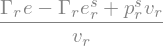

In [3]:
#TEST
f1 = - e + ((1 - lambd) * (e_r_s + (v_r/gam_r) * (p - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f2 = sympy.solve(f1, p)
f2[0].subs(lambd, 0).simplify()

Find the initial energy
===

Set $\lambda= 0$ 

$$
e(v, p, \phi)=e_{r}^{s}(v_{r})+\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]
$$

with $v_{r}=\phi v$ and 

$$
p_{r}^{s}(v_{r})=\hat{p}\left[\sum_{j=1}^{3} \frac{(4 B y(v_{r}))^{j}}{j !}+C \frac{(4 B y(v_{r}))^{4}}{4 !}+\frac{(y(v_{r}))^{2}}{(1-y(v_{r}))^{4}}\right]
$$

with $\hat{p}=\rho_{0} A^{2} / 4 B$, the energy term is given by

$$
e_{r}^{s}(v_{r})=v_{0} \int_{0}^{y(v_{r})} p_{r}^{s}(\bar{y}) d \bar{y}+e_{0}
$$

$$
\Gamma_{r}(v_{r})=\Gamma_{r}^{0}+Z y(v_{r})
$$

and 
$$
y(v_{r}) =1-v_{r} / v_{0}
$$

TODO: Is this really $v_{r}$ or should it be $v$?

$$
e(v, p, \phi)=e_{r}^{s}(v_{r})+\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]
$$

$$
e(v, p, \phi)= 0 =v_{0} \int_{0}^{y(v_{r})} p_{r}^{s}(\bar{y}) d \bar{y}+e_{0}+\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]
$$

Note that either $p= p_0$ or $p=0$ (when starting from an initial isotherm; literature is unclear)

$$
e_{0} = -v_{0} \int_{0}^{y(v_{r})} p_{r}^{s}(\bar{y}) d \bar{y}-\frac{v_{r}}{\Gamma_{r}(v_{r})}\left[p / \phi-p_{r}^{s}(v_{r})\right]
$$

$v_0 = 757.57$ (mm$^3$/g), so $v_r = \phi v_{0} = 568.18$  (mm$^3$/g)




note that $y(v_{0}) =1-v_{0}/ v_{0} = 0.0$ so (also confirmed numerically INT(v_0)) :
$\int_{0}^{0} p_{r}^{s}(\bar{y}) d \bar{y} = 0$

Assume instead that $y(v_{r}) =1-\phi v_{0}/ v_{0} = 0.25$ so 

$$
\int_{0}^{0.25} p_{r}^{s}(\bar{y}) d \bar{y} = 0.0005621076548032407
$$


v_0 * INT =  $v_0 \int_{0}^{0.25} p_{r}^{s}(\bar{y}) d \bar{y}  = 0.4258391324266975$

$p_{r}^{s}(v_{r} = \phi v_0) = 0.006679760758101851 $

$ \Gamma_{r}(v_{r} = \phi v_0) = 1.0183499999999999$


if $p= p_0$:

-v_0 * INT[0] - ((phi_0*v_0)/gamma_r(phi_0*v_0))*(p_0/phi_0 -p_s_r(phi_0*v_0))= 3.301014946420688

$e_{0} = 3.301014946420688$ (kJ / g )


if $p= 0.0$:

-v_0 * INT[0] - ((phi_0*v_0)/gamma_r(phi_0*v_0))*(p_0/phi_0 -p_s_r(phi_0*v_0))= 3.301014946420688

$e_{0} =  3.3010903245948287$ (kJ / g )




In [76]:
import sympy
sympy.init_printing()
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s, INT = sympy.symbols('e, e_p^s, e_r^s, v_p, v_ps, v_r, Phi, phi, lambda, v, phi, Gamma_p, Gamma_r, p, p_p^s, p_r^s, INT')
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s, INT

In [83]:
f2 = - e + ((1 - lambd) * ((INT + e) + (v_r/gam_r) * (p/phi - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f2

-e + lambda*(e_p^s + v_p*(p - p_p^s)/Gamma_p) + (-lambda + 1)*(INT + e + v_r*(p/phi - p_r^s)/Gamma_r)

Note that lambd_0 = 0:

In [81]:
f2 = - e + (((INT + e) + (v_r/gam_r) * (p/phi - p_r_s))  
            )  # = 0
f2

INT + v_r*(p/phi - p_r^s)/Gamma_r

In [84]:
sympy.init_printing(False)
sympy.solve(f2, e)

[-INT + INT/lambda + e_p^s - p*v_r/(Gamma_r*phi) + p_r^s*v_r/Gamma_r + p*v_r/(Gamma_r*lambda*phi) - p_r^s*v_r/(Gamma_r*lambda) + p*v_p/Gamma_p - p_p^s*v_p/Gamma_p]

New approach 2020.11.28
---


Approach to compute the internal energy from the fundamental thermodynamic definition:

$$d U=C_{V} d T+\left[T\left(\frac{\partial P}{\partial T}\right)_{V}-P\right] d V$$

Where $C_{V}= 992 $ (J / kg K)



First start with the WREOS definition for Pressure when $\lambda=0$

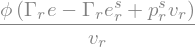

In [27]:
sympy.init_printing(1)
f2 = sympy.solve(f1, p)
f2[0].subs(lambd, 0).simplify()

In [28]:
f2[0].subs(lambd, 0).subs(v_r, phi).simplify()

$$
P(v,T) = \frac{\phi\left(\Gamma_{r}(v) e-\Gamma_{r}(v) e_{r}^{s}(v)+p_{r}^{s}(v) v_{r}\right)}{v_{r}}
$$

where $v_{r}=\phi v$

Note that at initial conditions we have:

$$e_{r}^{s}(v)=v_{0} \int_{0}^{y} p_{r}^{s}(\bar{y}) d \bar{y}+e_{0}$$

where 

$$y(v) = 1-v / v_{0} =  1-v_{0}/ v_{0} = 0$$

so the limits in the integral in the first term are:

$$v_{0} \int_{0}^{y} p_{r}^{s}(\bar{y}) d \bar{y} = v_{0} \int_{0}^{0} p_{r}^{s}(\bar{y}) d \bar{y} = 0$$

then

$$e_{r}^{s}(v)=e_{0}$$


The WREOS becomes:

$$
P_0 = P(v_0,T) = \frac{\phi\left(\Gamma_{r}(v_0) e_0-\Gamma_{r}(v_0) e_0+p_{r}^{s}(v) v_{r}\right)}{v_{r}}
$$

Next note that 
$$
\Gamma_{r}(v_{0})=\Gamma_{r}^{0}+Z y(v_{0}) = \Gamma_{r}^{0} + Z (0) = \Gamma_{r}^{0} 
$$

so

$$
P_0 = P(v_0,T) = \frac{\phi\left(\Gamma_{r}^{0} e_0-\Gamma_{r}^{0}  e_0+p_{r}^{s}(v) v_{r}\right)}{v_{r}} = \frac{\phi\left(p_{r}^{s}(v) v_{r}\right)}{v_{r}} = \phi p_{r}^{s}(v)
$$

Since $\phi p_{r}^{s}(v)$ is a function of $v$ only we have $\left(\frac{\partial P}{\partial T}\right)_{V} = 0 $

so:

$$d U=C_{V} d T+\left[T\left(\frac{\partial P}{\partial T}\right)_{V}-P\right] d V$$

becomes:
NOTE: WRONG: integral below this is wrong; need to substitute the FTC derivative not func directly

$$d U=C_{V} d T+\left[-P\right] d V$$

Now integrate from absolute zero to initial conditions:

$$\int_{e_{(T=0K)}}^{e_0} d U= \int_0^{273.15+25}C_{V} d T -  \int_{\infty}^{v_0} P(v,e) d v $$

$$ e_0 - e_{(T=0K)} =  (273.15+25) \times 992  -  \int_{\infty}^{v_0} P(v,e) d v $$

$ (273.15+25) \times 992  = 295764.8 $ (J / kg ) = 0.2957648  (kJ / g)


$$ e_0 - e_{(T=0K)} = 295764.8  -  \int_{\infty}^{v_0} P(v,e) d v $$


In [29]:
# Expression for pressure
f2[0].subs(lambd, 0).subs(v_r, phi).simplify()